# Derivatives

In [2]:
import torch

# Find derivative of y(x) = x^2 + 2x + 5 at x=3

x = torch.tensor(2., requires_grad=True)
y = x**2 + 2*x + 5
y.backward()
print (f'x.grad = {x.grad}')
print (f'x.grad.item() = {x.grad.item()}')

x.grad = 6.0
x.grad.item() = 6.0


# Dataset & Transforms

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms

class Dataset(Dataset):
    def __init__(self, datadir=None, img_csv_file=None, transform=None):
        self.datadir = datadir
        self.transform = transform
        self.df = pd.read_csv(os.path.join(self.datadir, img_csv_file))
        
    def __getitem__ (self, idx):
        cat = self.df.iloc[idx][0]
        img = self.df.iloc[idx][1]
        img_arr = Image.open(os.path.join(self.datadir, img))
        
        if (self.transform):
            # transform converts to a (1,20,20) tensor, which is then reshaped to a (20,20) tensor or numpy array
            img_arr = self.transform(img_arr)
            img_arr = torch.reshape(img_arr, (20,20))
            #             img_arr = self.transform(img_arr).numpy().reshape(20,20)
            
        plt.imshow(img_arr)
        plt.title(cat)
        return(cat, img)
    
    def __len__(self):
        return(self.df.shape[0])
    
    

In [ ]:
croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(datadir="./data" , img_csv_file="index.csv", transform=None )
dataset = Dataset(datadir="./data" , img_csv_file="index.csv", transform=croptensor_data_transform)

dataset[9]

In [ ]:
# Without Transforms
dataset = Dataset('./data', 'index.csv')
plt.figure(figsize=(30,20))
for i in range(5):
    plt.subplot(1,5,i+1)
    dataset[i]

# With Transforms
dataset = Dataset('./data', 'index.csv', transform=croptensor_data_transform)
plt.figure(figsize=(30,20))
for i in range(5):
    plt.subplot(1,5,i+1)
    dataset[i]

# Linear Regression

In [ ]:
import torch 

x = torch.randint(1,5,(3,1))
w = torch.tensor(2.0)
b = torch.tensor(-1.0)

print (x)

y = w*x + b
print (y)

In [ ]:
from torch.nn import Linear

torch.manual_seed(42)

# y = 0.7645x + 0.8300  (w=0.7645, b=0.8300), for random seed 42
lr = Linear(in_features=1, out_features=1, bias=True)
print (f'Parameters = {list(lr.parameters())}')
print ('-'*50)
print(lr.state_dict())
print (lr.state_dict().keys())
for key, val in lr.state_dict().items():
    print (f'{key} = {val}')
print ('-'*50)
x = torch.tensor([[1.], [2.]])
x = torch.randn(5,1)
yhat = lr(x)
print ('x = ', x)
print ('yhat = ', yhat)

In [ ]:
# Create custom nn Module

from torch import nn

class LR(nn.Module):
    def __init__ (self, input_size, outout_size):
        super(LR, self).__init__()
        self.lr_model = nn.Linear(input_size, outout_size)
        
    def forward(self, x):
        y_pred = self.lr_model(x)
        return (y_pred)

In [ ]:
lr = LR(1,1)
print("The parameters: ", list(lr.parameters()))
print("Linear model: ", lr.lr_model)
print ('-'*50)
x = torch.randn(5,1)
yhat = lr(x)
print ('x = ', x)
print ('yhat = ', yhat)

# Loss & Optimization

In [ ]:
# Create Dataset class
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(45)

class Dataset(Dataset):
    def __init__(self, size):
        self.x = torch.linspace(-6,6,steps=size).view(-1,1)
        self.f = 1 * self.x -1
        self.y = self.f + torch.randint(-10,10,(size,1)) * 0.01
        self.len = self.x.shape[0]
        
    def __getitem__(self, idx):
       return (self.x[idx], self.f[idx], self.y[idx])

    def __len__(self):
        return (self.len)

############
size = 100
dataset = Dataset(size)
############
plt.figure(figsize=(7,5))
plt.plot(dataset.x, dataset.f, 'b')
plt.plot(dataset.x, dataset.y, 'rx')

In [ ]:
# Create Model
from torch import nn, optim

class LR(nn.Module):
    def __init__(self,input_size,output_size):
        super(LR, self).__init__()
        self.lr_model = nn.Linear(input_size, output_size)
        
    def forward (self, x):
        yhat = self.lr_model(x)
        return (yhat)
    
# Instantiate model
model = LR(1,1)
model.state_dict()

In [ ]:
# Cost function
criterion = nn.MSELoss()

# Create optimzier
optimizer = optim.SGD(model.parameters(), lr=0.01)
list(model.parameters()), optimizer.state_dict()

In [ ]:
# Create DataLoader

trainloader = DataLoader(dataset=dataset, batch_size=1)

def train_model_BGD(iter):
    for epoch in range(iter):
        for x, f, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
train_model_BGD(10)

In [ ]:
w = model.state_dict()['lr_model.weight'].item()
b = model.state_dict()['lr_model.bias'].item()
x = dataset.x
y = w*x + b

plt.plot(dataset.x, dataset.y, 'r')
plt.plot(x, y, 'b--')

# Multiple Linear Regression

In [ ]:
from torch import nn

class Linear(nn.Module):
    def __init__(self, input_size, output_size):
        super(Linear, self).__init__()
        self.lr_model = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        return (self.lr_model(x))

In [ ]:
lr_model = Linear(2,1)
lr_model.state_dict()['lr_model.weight'].shape

x = torch.randn((5,2))
lr_model(x)

In [ ]:
a = torch.randint(0,5,(1,2))
b = torch.randint(0,5,(2,2))
c = torch.randint(0,5,(1,2))

print (a)
print (20*'-')
print (b)
print (20*'-')
print (c)

# Logistic Regression

## Sequential Model

In [ ]:
import torch
import torch.nn as nn

torch.manual_seed(45)
x = torch.randn(3,2)
# x = torch.ones(3,1)
logR_seq_model = nn.Sequential(nn.Linear(2,1), nn.Sigmoid())
print ('x = ', x)
print ('\nModel parameters = \n', logR_seq_model.parameters, '\nModel state dictionary = \n', logR_seq_model.state_dict())
print ('-'*30)
print ('Model predictions = \n', logR_seq_model(x))

## Custom Model

In [ ]:
import torch
from torch.nn import Module

class logR(Module):
    def __init__(self, input_size, output_size):
        super(logR, self).__init__()
        self.logR_model = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        yhat = self.logR_model(torch.sigmoid(x))
        return (yhat)

In [ ]:
torch.manual_seed(45)

logR_custom_model = logR(2,1)
logR_custom_model.state_dict()['logR_model.weight'].data[0] = torch.tensor([[-0.1108, -0.3715]])
logR_custom_model.state_dict()['logR_model.bias'].data[0] = torch.tensor([0.4399])
print (logR_custom_model.state_dict())

print ('x = ', x)
print ('\nModel parameters = \n', logR_custom_model.parameters, '\nModel state dictionary = \n', logR_custom_model.state_dict())
print ('-'*30)
print ('Model predictions = \n', logR_custom_model(x))

## Binary Classification - using Sigmoid activation

In [ ]:
import torch
import torch.nn as nn
from torch.nn import Module
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Cerate dataset

class Data(Dataset):
    def __init__(self, samples=5, input_size=2, output_size=1, classes=2):
        self.x = torch.randn(samples, input_size, dtype=torch.float32)
        self.y = torch.zeros(samples,1)
        self.y[torch.sum(self.x, dim=1)>0] = 1
        self.len = self.x.shape[0]
        
    def __getitem__(self, idx):
        return (self.x[idx], self.y[idx])
    
    def __len__(self):
        return (self.len)

In [ ]:
# Cerate custom model

class logR(nn.Module):
    def __init__(self, input_size=2, output_size=1):
        super(logR, self).__init__()
        self.logR_model = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        return (torch.sigmoid(self.logR_model(x)))

In [ ]:
torch.manual_seed(45)

# Initiialize datset & model
dataset = Data(samples=1000, input_size=3, output_size=1, classes=2)
trainloader = DataLoader(dataset=dataset, batch_size=1)
logR_model = logR(input_size=3, output_size=1)

In [ ]:
# Train model

def train_model_logR(iter=5):
    for epoch in range(iter):
        for x, y in trainloader:
            yhat = logR_model(x)
            loss = criterion(yhat, y.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            return (loss)

criterion = nn.MSELoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(logR_model.parameters(), lr=learning_rate)
train_model_logR(iter=6)

In [ ]:
# Predict & check accuracy

yhat = logR_model(dataset.x)
yhat[yhat >= 0.5] = 1
yhat[yhat < 0.5] = 0
print (f'Accuracy = {(yhat == dataset.y).sum().item()/len(yhat)*100}%')

In [ ]:
yhat = logR_model(dataset.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == dataset.y.type(torch.ByteTensor)).type(torch.float)))

## Multiclass Classification - using Softmax activation

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

In [ ]:
# Get training & validation data

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

# Create and print the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

In [ ]:
for i in range (1,6):
    plt.subplot(1,5,i)
    plt.imshow(train_dataset[i-1][0].view(28,28))
    plt.title(train_dataset[i-1][1])

In [ ]:
class Softmax(nn.Module):
    def __init__(self, input_size=None, output_size=None):
        super(Softmax, self).__init__()
        self.softmax_model = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        return (self.softmax_model(x))

In [ ]:
softmax_model = Softmax(input_size=784, output_size=10)
learning_rate = 0.01
optimizer = torch.optim.SGD(softmax_model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

train_loader = DataLoader(dataset=train_dataset, batch_size=32)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=100)

In [ ]:
# Train & Validate

def train_val_model_softmax(epochs=5):
    for epoch in tqdm(range(epochs)):
        # Train model
        total = 0
        for x_train, y_train in train_loader:
            z_train_pred = softmax_model(x_train.view(-1,784))
            loss = criterion(z_train_pred, y_train)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
#             training_loss.append(loss.data.item())
    
        # Predict & validate model
        correct = 0
        for x_test, y_test in validation_loader:
            z = softmax_model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / test_samples
        validation_loss.append(loss.data)
        validation_accuracy.append(accuracy)
        
epochs=10
test_samples = len(validation_dataset)   
training_loss = []
validation_loss = []
validation_accuracy = []

train_val_model_softmax(epochs=10)

In [ ]:
plt.figure(figsize=(7,4))
ax1 = plt.subplot(1,1,1)
ax1.plot(validation_accuracy, linewidth=3)
ax1.set_xlabel('epochs', fontsize=18)
ax1.set_ylabel('accuracy', fontsize=18)
ax1.legend(['val accuracy'], loc=3)
ax2 = ax1.twinx()
ax2.plot(validation_loss, 'r--')
ax2.set_ylabel('loss', fontsize=18)
ax2.legend(['val loss'], loc=2)
plt.show()

In [ ]:
idx = 99

img = validation_loader.dataset[idx][0].view(-1,28)
label = validation_loader.dataset[idx][1]
pred = softmax_model(validation_loader.dataset[idx][0].view(-1,28*28))
plt.imshow(img)
plt.title(f'label={label}   Prediction={pred.argmax().item()}', fontsize=10)
plt.show()

# Neural Networks

In [ ]:
import torch
from torch import nn
import torchvision.datasets as dsets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [ ]:
# Get training & validation data

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

# Create and print the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

In [ ]:
# Initialize Neural Net with 784 input neurons, 100 hidden neurons & 10 output neurons using Sequential model
nn1 = nn.Sequential(
    nn.Linear(784, 100),
    nn.Sigmoid(),
    nn.Linear(100, 10),
#     nn.Sigmoid()
)

In [ ]:
class NN(nn.Module):
    def __init__(self, input_size=None, hlayer1_size=None, output_size=None):
        super(NN, self).__init__()
        self.linear1 = nn.Linear(input_size, hlayer1_size)
        self.linear2 = nn.Linear(hlayer1_size, output_size)
    
    def forward(self,x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return (x)

In [ ]:
# Initialize Neural Net with 784 input neurons, 100 hidden neurons & 10 output neurons
nn1 = NN(input_size=28*28, hlayer1_size=100, output_size=10)

learning_rate = 0.01
optimizer = torch.optim.SGD(nn1.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

train_loader = DataLoader(dataset=train_dataset, batch_size=32)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=100)

In [ ]:
# Train & Validate

def train_val_model_nn1(epochs=5):
    for epoch in tqdm(range(epochs)):
        # Train model
        total = 0
        for x_train, y_train in train_loader:
            z_train_pred = nn1(x_train.view(-1,784))
            loss = criterion(z_train_pred, y_train)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            training_loss.append(loss.data.item())
    
        # Predict & validate model
        correct = 0
        for x_test, y_test in validation_loader:
            z = nn1(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / test_samples
        validation_loss.append(loss.data)
        validation_accuracy.append(accuracy)
        
epochs=10
test_samples = len(validation_dataset)   
training_loss = []
validation_loss = []
validation_accuracy = []

train_val_model_nn1(epochs=10)

In [ ]:
plt.figure(figsize=(7,4))
ax1 = plt.subplot(1,1,1)
ax1.plot(validation_accuracy, linewidth=3)
ax1.set_xlabel('epochs', fontsize=18)
ax1.set_ylabel('accuracy', fontsize=18)
ax1.legend(['val accuracy'], loc=3)
ax2 = ax1.twinx()
ax2.plot(validation_loss, 'r--')
ax2.set_ylabel('loss', fontsize=18)
ax2.legend(['val loss'], loc=2)
plt.show()

# Feed Forward Network - Without Dropout

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

In [ ]:
class Data(Dataset):
    
    #  modified from: http://cs231n.github.io/neural-networks-case-study/
    # Constructor
    def __init__(self, K=3, N=500):
        D = 2
        X = np.zeros((N * K, D)) # data matrix (each row = single example)
        y = np.zeros(N * K, dtype='uint8') # class labels
        for j in range(K):
          ix = range(N * j, N * (j + 1))
          r = np.linspace(0.0, 1, N) # radius
          t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 # theta
          X[ix] = np.c_[r * np.sin(t), r*np.cos(t)]
          y[ix] = j
        self.y = torch.from_numpy(y).type(torch.LongTensor)
        self.x = torch.from_numpy(X).type(torch.FloatTensor)
        self.len = y.shape[0]
    
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [ ]:
class NN(nn.Module):
    # constructor
    def __init__(self, Layers):
        super(NN, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))
            
    # Predict
    def forward(self, x):
        nn_len = len(self.hidden)
        for i, layer in enumerate(self.hidden):
            if (i < nn_len-1):
                x = F.relu(layer(x))
            else:
                x = layer(x)
        return (x)

In [ ]:
torch.manual_seed(45)

dataset = Data()
Layers = [2, 50, 3]

in_size = Layers[0]
n_hidden = Layers[1]
out_size = Layers[2]

nn_m = NN(Layers)
model = nn_m
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = DataLoader(dataset=dataset, batch_size=20)

In [ ]:
# The function to calculate the accuracy
def accuracy(model, dataset):
    _, yhat = torch.max(model(dataset.x), 1)
    return (yhat == dataset.y).numpy().mean()

# Train & Validate
def train_val_model(dataset=None, train_loader=None, model=None, optimizier=None, criterion=None, epochs=5):
    training_loss = []
    training_accuracy = []
    for epoch in tqdm(range(epochs)):
        # Train model
        for x_train, y_train in train_loader:
            z_train_pred = model(x_train)
            loss = criterion(z_train_pred, y_train)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            training_loss.append(loss.item())
        training_accuracy.append(accuracy(model, dataset))
    return (training_accuracy, training_loss)

training_accuracy, training_loss = train_val_model(dataset=dataset, train_loader=train_loader, model=model, optimizier=optimizer, 
                                criterion=criterion, epochs=100)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(training_accuracy, linewidth=3)
plt.title ('Training Accuracy')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(training_loss[::500], 'r--', linewidth=2)
plt.title ('Training Loss')
plt.ylabel('Loss')
plt.show()

# Feed Forward Network - With Dropout

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.backends import cudnn
torch.manual_seed(45)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if device.type == 'cuda':
    torch.cuda.manual_seed(45)
    cudnn.benchmark = True

import numpy as np
np.random.seed(45)
    
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

In [ ]:
# Create data class for creating dataset object

class Data(Dataset):
    
    # Constructor
    def __init__(self, N_SAMPLES=1000, noise_std=0.15, train=True):
        a = np.matrix([-1, 1, 2, 1, 1, -3, 1]).T
        self.x = np.matrix(np.random.rand(N_SAMPLES, 2))
        self.f = np.array(a[0] + (self.x) * a[1:3] + np.multiply(self.x[:, 0], self.x[:, 1]) * a[4] + np.multiply(self.x, self.x) * a[5:7]).flatten()
        self.a = a
       
        self.y = np.zeros(N_SAMPLES)
        self.y[self.f > 0] = 1
        self.y = torch.from_numpy(self.y).type(torch.LongTensor)
        self.x = torch.from_numpy(self.x).type(torch.FloatTensor)
        self.x = self.x + noise_std * torch.randn(self.x.size())
        self.f = torch.from_numpy(self.f)
        self.a = a
        if train == True:
            torch.manual_seed(1)
            self.x = self.x + noise_std * torch.randn(self.x.size())
            torch.manual_seed(0)
        
    # Getter        
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Make a multidimension ploynomial function
    def multi_dim_poly(self, x):
        x = np.matrix(x)
        out = np.array(self.a[0] + (x) * self.a[1:3] + np.multiply(x[:, 0], x[:, 1]) * self.a[4] + np.multiply(x, x) * self.a[5:7])
        out = np.array(out)
        return out
    
# Cerate dataset
dataset = Data()

# Split into train & validation datasets
x_train, x_test, y_train, y_test = train_test_split(dataset.x.numpy(), dataset.y.numpy(), test_size=0.2,
                                                   random_state=42)

# Switch back from numpy to Pytorch tensor & dataset
x_train_tensor = torch.tensor(x_train)
x_test_tensor= torch.tensor(x_test)
y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

# Create dataloaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

x = train_dataset[:][0]
y = train_dataset[:][1]

x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = dataset.multi_dim_poly(np.c_[xx.ravel(), yy.ravel()]).flatten()
f = np.zeros(Z.shape)
f[Z > 0] = 1
f = f.reshape(xx.shape)

plt.figure(figsize=(10,5))
plt.plot(x[y == 0, 0].numpy(), x[y == 0,1].numpy(), 'bo', label='y=0')
plt.plot(x[y == 1, 0].numpy(), x[y == 1,1].numpy(), 'ro', label='y=1')
plt.contour(xx, yy, f,cmap=plt.cm.Paired)

plt.show()

In [ ]:
# Hyper-parameters 
input_size = 2
hidden_size = 300 
num_classes = 2
dropout = 0.5
num_epochs = 100
batch_size = 64
learning_rate = 0.01

# Create model class - default weight intialization
class NN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, p=0):
        super(NN, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.drop = nn.Dropout(p=p)
        self.act = nn.ReLU()
        
    def forward(self, x):
        out = self.l1(x)
        out = self.drop(out)
        out = self.act(out)
        out = self.l2(out)
        out = self.drop(out)
        out = self.act(out)
        out = self.l3(out)
        return (out)

# Create model class - Xavier intialization   
class NN_X(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, p=0):
        super(NN_X, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.xavier = torch.nn.init.xavier_uniform_(self.l1.weight)
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.drop = nn.Dropout(p=p)
        self.act = nn.Tanh()
        
    def forward(self, x):
        out = self.l1(x)
        out = self.drop(out)
        out = self.act(out)
        out = self.l2(out)
        out = self.drop(out)
        out = self.act(out)
        out = self.l3(out)
        return (out)
    
# Create model class - Xavier intialization   
class NN_HE(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, p=0):
        super(NN_HE, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.he = torch.nn.init.kaiming_uniform_(self.l1.weight, nonlinearity='relu')
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.drop = nn.Dropout(p=p)
        self.act = nn.ReLU()
        
    def forward(self, x):
        out = self.l1(x)
        out = self.drop(out)
        out = self.act(out)
        out = self.l2(out)
        out = self.drop(out)
        out = self.act(out)
        out = self.l3(out)
        return (out)    
    
# Instantiate model
# model = NN(input_size, hidden_size, num_classes, p=dropout).to(device)
model = NN_X(input_size, hidden_size, num_classes, p=dropout).to(device)
# model = NN_HE(input_size, hidden_size, num_classes, p=dropout).to(device)

# Define Loss & Optimzier
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Function to train the model & compute training loss/accuracy
def train_model():
    n_correct = 0
    train_accuracy = []
    train_loss = []
    total_samples = 0
    for epoch in tqdm(range(num_epochs)):
        for i, (x_train, y_train) in enumerate(train_loader):
            x_train = x_train.to(device)
            y_train = y_train.to(device)
            # Forward pass
            yhat_train = model(x_train)
            loss = criterion(yhat_train, y_train)

            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Compute accuracy
            _, predicted = torch.max(yhat_train.data, 1)
            n_correct += (predicted == y_train).sum().item()
            total_samples+=len(y_train)
            
        # Append loss & accuracy after each epoch
        train_loss.append(loss.item())
        train_accuracy.append(n_correct/total_samples)
    return(train_accuracy, train_loss)

# Train the model
train_accuracy, train_loss = train_model()

# Plot training accuracy & loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_accuracy[::25])
plt.title ('Training Accuracy')
plt.subplot(1,2,2)
plt.plot(train_loss[::25])
plt.title ('Training Loss')
plt.show()

In [ ]:
# Function to test the model & compute testing loss/accuracy
# In test phase, we don't need to compute gradients (for memory efficiency)
def test_model():
    with torch.no_grad():
        n_correct = 0
        test_accuracy = []
        test_loss = []
        total_samples = 0
        for i, (x_test, y_test) in enumerate(test_loader):
            x_test = x_test.to(device)
            y_test = y_test.to(device)
            yhat_test = model(x_test)
            loss = criterion(yhat_test, y_test)
            
            # Compute accuracy
            _, predicted = torch.max(yhat_test.data, 1)
            n_correct += (predicted == y_test).sum().item()
            total_samples+=len(y_test)
            
            # Append loss & accuracy after each epoch
            test_loss.append(loss.item())
            test_accuracy.append(n_correct/total_samples)

        return(test_accuracy, test_loss)
    
# Test the model

test_accuracy, test_loss = test_model()

# Plot training accuracy & loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(test_accuracy)
plt.title ('Testing Accuracy')
plt.subplot(1,2,2)
plt.plot(test_loss)
plt.title ('Testing Loss')
plt.show()

# CNN

## Face Capture

In [1]:
################################################################################################################################
# Modified code from adarsh1021 
# https://github.com/adarsh1021/facedetection/blob/master/detect_face_video.py
# ebharucha: 12/7/2020
################################################################################################################################
import cv2
import os
from tqdm import tqdm

label = input('Enter the face label: ')

if not os.path.exists(f'./images/{label}'):
    os.makedirs('./images/{label}')

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# To capture video from webcam. 
cap = cv2.VideoCapture(1)

count = 1

while tqdm(True):
    # Read the frame
    _, img = cap.read()

    # Convert to grayscale
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect the faces
    # faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    faces = face_cascade.detectMultiScale(img, 1.1, 4)

    # Draw the rectangle around each face & store images
    for (x, y, w, h) in faces:
        # cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.rectangle(img, (x-30, y-70), (x + w + 20, y + h + 20), (255, 0, 0), 2)
        print(x, y, w, h)
        # Write image
        # cv2.imwrite(f'./images/{label}/{label}_{count}.jpg', gray[y-70:y+h+20,x-30:x+w+20])
        cv2.imwrite(f'./images/{label}/{label}_{count}.jpg', img[y-70:y+h+20,x-30:x+w+20])
        count += 1
        # Display
        cv2.imshow('img', img)

    # Stop if escape key is pressed or stored images exceed count 
    k = cv2.waitKey(100) & 0xff
    if ((k==27) or (count>100)):
        break
        
# Release the VideoCapture object
cap.release()

## Data Prep

In [2]:
################################################################################################################################
# ebharucha: 12/7/2020
################################################################################################################################

# Import dependencies
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

# Define class to create Train & Test data
class TrainTest():
    def __init__(self, img_dir):
        self.classes = []
        imgpath = []
        label = []
        dirs = [x[0] for x in os.walk(img_dir)]
        for d in dirs[1:]:
            class_ = d.split('/')[-1]
            self.classes.append(class_)
            for f in os.listdir(d):
                imgpath.append(os.path.join(f'{d}/{f}'))
                label.append(self.classes.index(class_))
        self.df = pd.DataFrame()
        self.df['imgpath'] = imgpath
        self.df['label'] = label
        self.X_train, self.X_test, self.y_train, self.y_test = self.create_train_test_data(self.df)
    
    def create_train_test_data(self, df):
        X = df.imgpath
        y = df.label
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
        return(X_train, X_test, y_train, y_test)

# Define dataset class
class DatasetImg(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __getitem__(self, idx):
        X_arr = Image.open(self.X.iloc[idx])
        y = self.y.iloc[idx]
        if (self.transform):
            X_arr = self.transform(X_arr)
        return (X_arr, y)
    
    def __len__(self):
        return(self.X.shape[0])

# Define class to display sample images from dataloader
class imdisplay():
    def __init__(self, dataloader):
        dataiter = iter(dataloader)
        images, labels = dataiter.next()
        self.imshow(torchvision.utils.make_grid(images))

    def imshow(self, img):
        plt.figure(figsize=(15,7))
        img = img / 2 + 0.5  # unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.show()

# Initialize parameters
img_dir = './data/images/'
img_size = 128
batch_size = 10
img_transform = transforms.Compose([transforms.Resize(img_size), 
                                    transforms.RandomCrop(128),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.5], std=[0.5])])                                    

# Create Train, Test split
traintest = TrainTest(img_dir)

# Create Train, Test datasets & dataloaders
dataset_train = DatasetImg(traintest.X_train, traintest.y_train, img_transform)
dataloader_train = DataLoader(dataset=dataset_train, batch_size=batch_size)
dataset_test = DatasetImg(traintest.X_test, traintest.y_test, img_transform)
dataloader_test = DataLoader(dataset=dataset_test, batch_size=batch_size)

## CNN 

In [ ]:
# Import dependencies
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import prep_data
import matplotlib.pyplot as plt

# Define CNN class
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.conv4 = nn.Conv2d(128, 256, 3)
        self.conv5 = nn.Conv2d(256, 512, 1)
        self.fc1 = nn.Linear(512 * 3 * 3, 1024)
        self.fc2 = nn.Linear(1024, 136)
        self.fc3 = nn.Linear(136, 5)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))  
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = x.view(-1, 512 * 3 * 3)
        x = F.relu(self.fc1(x))               
        x = F.relu(self.fc2(x))               
        x = self.fc3(x)                       
        return x

# Function to plot Accuracy & Loss
def plot_acc_loss(train_test, accuracy, loss_):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(accuracy)
    plt.title (f'{train_test} Accuracy')
    plt.subplot(1,2,2)
    plt.plot(loss_)
    plt.title (f'{train_test} Loss')
    plt.show()

# Function to train model
def train_model(model, num_epochs, dataloader, device, criterion, optimizer):
    n_correct = 0
    train_accuracy = []
    train_loss = []
    total_samples = 0
    for epoch in range(num_epochs):
        for i, (X_train, y_train) in tqdm(enumerate(dataloader)):
            X_train = X_train.to(device)
            y_train = y_train.to(device)
            # Forward pass
            yhat_train = model(X_train)
            loss = criterion(yhat_train, y_train)
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # Compute accuracy
            _, predicted = torch.max(yhat_train.data, 1)
            n_correct += (predicted == y_train).sum().item()
            total_samples+=len(y_train)
        
        # Loss & accuracy per epoch
        train_loss.append(loss.item())
        train_accuracy.append(n_correct/total_samples)        
        print(f'Epoch {epoch+1}/{num_epochs} => Training Loss: {loss.item():.4f}')
    
    plot_acc_loss(train_test='Train', accuracy=train_accuracy, loss_=train_loss)

    return (model)

# Function to test model
def test_model(model, dataloader, device, criterion):
    with torch.no_grad():
        n_correct = 0
        test_accuracy = []
        test_loss = []
        total_samples = 0
        for i, (X_test, y_test) in enumerate(dataloader):
            X_test = X_test.to(device)
            y_test = y_test.to(device)
            yhat_test = model(X_test)
            loss = criterion(yhat_test, y_test)
            
            # Compute accuracy
            _, predicted = torch.max(yhat_test.data, 1)
            n_correct += (predicted == y_test).sum().item()
            total_samples+=len(y_test)
            
            # Append loss & accuracy
            test_loss.append(loss.item())
            test_accuracy.append(n_correct / total_samples)
            
        # Print Test Accuracy & Loss
        print (f'Test Accuracy: {test_accuracy[-1]:.4f}')
        print (f'Test Loss: {test_loss[-1]:.4f}')

    plot_acc_loss(train_test='Test', accuracy=test_accuracy, loss_=test_loss)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 3
batch_size = 5
learning_rate = 0.001

# Instantiate model
model = ConvNet().to(device)

# Define Loss & Optimzier
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# # Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Train model        
model = train_model(model, num_epochs, prep_data.dataloader_train, device, criterion, optimizer)
# Test model
test_model(model, prep_data.dataloader_test, device, criterion)

MODELPATH = './models/cnn1.pt'
torch.save(model, MODELPATH)

## CNN - Transfer Learning

 20%|████████████████▊                                                                   | 1/5 [00:03<00:12,  3.13s/it]

Epoch 1/5 => Training Loss: 0.1195


 40%|█████████████████████████████████▌                                                  | 2/5 [00:05<00:08,  3.00s/it]

Epoch 2/5 => Training Loss: 0.0196


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:08<00:05,  2.91s/it]

Epoch 3/5 => Training Loss: 0.0769


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:11<00:02,  2.85s/it]

Epoch 4/5 => Training Loss: 0.0255


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:13<00:00,  2.80s/it]

Epoch 5/5 => Training Loss: 0.0176


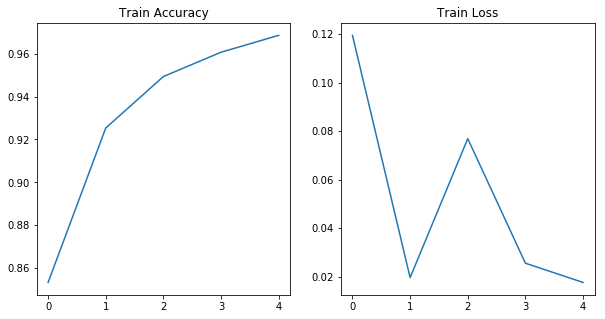

Test Accuracy: 1.0000
Test Loss: 0.0089


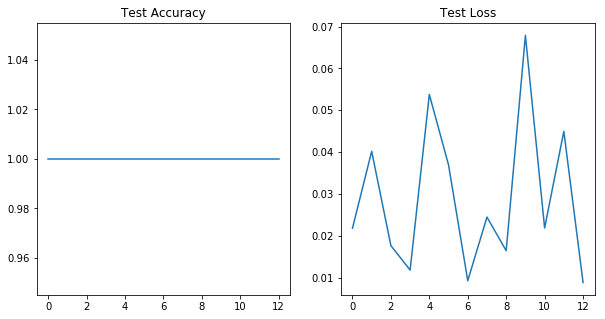

In [52]:
# Import dependencies
import torch
import torchvision
import torch.nn as nn
from tqdm import tqdm
# import prep_data
import matplotlib.pyplot as plt

# Function to plot Accuracy & Loss
def plot_acc_loss(train_test, accuracy, loss_):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(accuracy)
    plt.title (f'{train_test} Accuracy')
    plt.subplot(1,2,2)
    plt.plot(loss_)
    plt.title (f'{train_test} Loss')
    plt.show()

# Function to train model
def train_model(model, num_epochs, dataloader, device, criterion, optimizer):
    n_correct = 0
    train_accuracy = []
    train_loss = []
    total_samples = 0
    for epoch in tqdm(range(num_epochs)):
        for i, (X_train, y_train) in enumerate(dataloader):
            X_train = X_train.to(device)
            y_train = y_train.to(device)
            # Forward pass
            yhat_train = model(X_train)
            loss = criterion(yhat_train, y_train)
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # Compute accuracy
            _, predicted = torch.max(yhat_train.data, 1)
            n_correct += (predicted == y_train).sum().item()
            total_samples+=len(y_train)
        
        # Loss & accuracy per epoch
        train_loss.append(loss.item())
        train_accuracy.append(n_correct/total_samples)        
        print(f'Epoch {epoch+1}/{num_epochs} => Training Loss: {loss.item():.4f}')
    
    plot_acc_loss(train_test='Train', accuracy=train_accuracy, loss_=train_loss)

    return (model)

# Function to test model
def test_model(model, dataloader, device, criterion):
    with torch.no_grad():
        n_correct = 0
        test_accuracy = []
        test_loss = []
        total_samples = 0
        for i, (X_test, y_test) in enumerate(dataloader):
            X_test = X_test.to(device)
            y_test = y_test.to(device)
            yhat_test = model(X_test)
            loss = criterion(yhat_test, y_test)
            
            # Compute accuracy
            _, predicted = torch.max(yhat_test.data, 1)
            n_correct += (predicted == y_test).sum().item()
            total_samples+=len(y_test)
            
            # Append loss & accuracy
            test_loss.append(loss.item())
            test_accuracy.append(n_correct / total_samples)
            
        # Print Test Accuracy & Loss
        print (f'Test Accuracy: {test_accuracy[-1]:.4f}')
        print (f'Test Loss: {test_loss[-1]:.4f}')

    plot_acc_loss(train_test='Test', accuracy=test_accuracy, loss_=test_loss)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def choose_model(option):
    if (option == 'resnet'):
        # Load pre-trained model
        model = torchvision.models.resnet18(pretrained=True)
        print ('ConvNet as fixed feature extractor')
        for param in model.parameters():
            param.requires_grad = False
        # Parameters of newly constructed modules have requires_grad=True by default
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, 5)
    elif (option == 'vgg16'):
        model = torchvision.models.vgg16(pretrained=True)
        for param in model.parameters():
            param.requires_grad = False
        num_features = model.classifier[6].in_features
        features = list(model.classifier.children())[:-1] # Remove last layer
        features.extend([nn.Linear(num_features, 5)]) # Add our layer with 5 outputs
        model.classifier = nn.Sequential(*features) # Replace the model classifier
    return (model)

# Choose model
# Add final fully connected layer or
# FFE (Fixed Feature Extractor, freeze all but final layer)
# model = choose_model('')
# model = choose_model('resnet')
model = choose_model('vgg16')
model = model.to(device)

# Hyper-parameters
num_epochs = 5
batch_size = 10
learning_rate = 0.001

# Define Loss & Optimzier
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Train model        
model = train_model(model, num_epochs, dataloader_train, device, criterion, optimizer)
# Test model
test_model(model, dataloader_test, device, criterion)

MODELPATH = './data/models/cnn_tl2.pt'
torch.save(model, MODELPATH)

In [51]:
# model = torchvision.models.vgg16(pretrained=True)
model
list(model.classifier.children())[-1]

Linear(in_features=4096, out_features=1000, bias=True)

## Face Recognition

In [13]:
classes = traintest.classes
model.eval()

for im, la in dataloader_test:
    img = im[0].view(1, 3, 128, 128).to(device)
    yhat = model(img)
    label = torch.max(yhat.data, 1)[1]
    print (label.item())
    print (classes[label.item()])
    break

2
mama


In [18]:
# import prep_data
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from tqdm import tqdm

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load model
MODELPATH = './data/models/cnn_tl2.pt'
model = torch.load(MODELPATH)
model.eval()

def predict_face(path, c):
    im = Image.open(path)
    im = img_transform(im)
    im = im.view(1, 3, 128, 128).to(device)
    yhat = model(im)
    # print (yhat)
    label = torch.max(yhat.data, 1)[1].item()
#     print (label)
    return (classes[label])

idxs = np.random.randint(1,100, size=15)
classes = traintest.classes
correct = 0
wrong = 0

for c in tqdm(classes):
    for idx in idxs:
        pred = predict_face(f'./data/images/{c}/{c}_{idx}.jpg', c)
#         print('pred=', pred, '\t', 'actual=', c)
        if (pred == c):
            correct += 1
        else:
            wrong += 1

print ('correct = ', correct)
print ('wrong = ', wrong)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.03it/s]

correct =  75
wrong =  0


In [112]:
def predict_face(path, c):
    im = Image.open(path)
    im = prep_data.img_transform(im)
    im = im.view(1, 3, 128, 128).to(device)
    yhat = model(im)
    # print (yhat)
    label = torch.max(yhat.data, 1)[1].item()
    return (classes[label])

['baba', 'dylan', 'mama', 'naomi', 'tyler']

In [2]:
import time
time.sleep(2.0)
print ('hello')

hello


## Kaggle - House Price Prediction

In [1]:
import pandas as pd

df = pd.read_csv('./data/houseprice.csv')

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
cols = ["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]


df[cols].dropna().isnull().sum()


SalePrice      0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
YearBuilt      0
LotShape       0
1stFlrSF       0
2ndFlrSF       0
dtype: int64

In [10]:
import string

string.ascii_lowercase[:5]
string.ascii_lowercase[5:10]

'fghij'